In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
train.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [4]:
train.describe()

,Day,GrocerySales
count,692.000000,692.000000
mean,346.500000,8564.733471
std,199.907479,428.815668
min,1.000000,6766.370000
25%,173.750000,8411.536858
50%,346.500000,8677.770000
75%,519.250000,8852.387500
max,692.000000,9290.020000


In [5]:
train.isnull().sum()

Day             0
GrocerySales    0
dtype: int64

In [6]:
correlation_matrix = train.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cc0d28d0>,
      dtype=object)

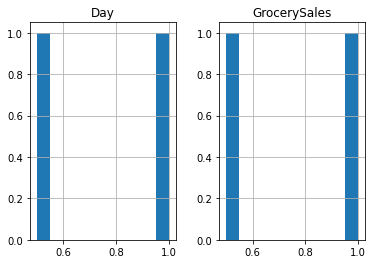

In [7]:
correlation_matrix.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2cc525cc0>,
      dtype=object)

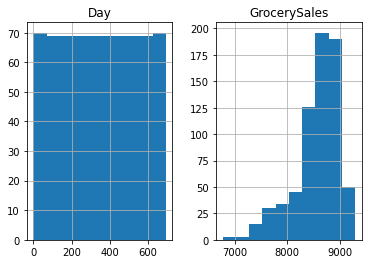

In [8]:
train.hist()

In [9]:
from sklearn.model_selection import train_test_split

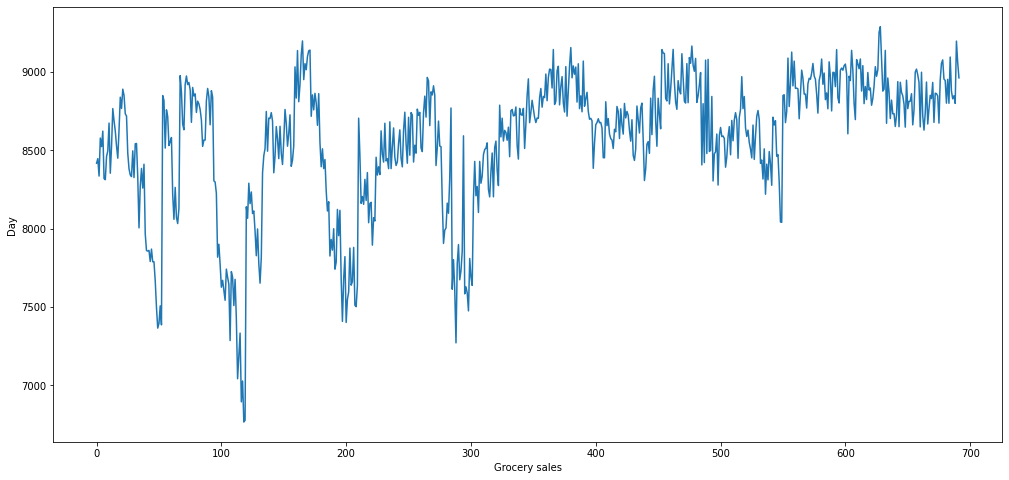

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 8))
plt.plot(train.GrocerySales)
# plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Day')
plt.xlabel('Grocery sales')
plt.grid(False)
plt.show()

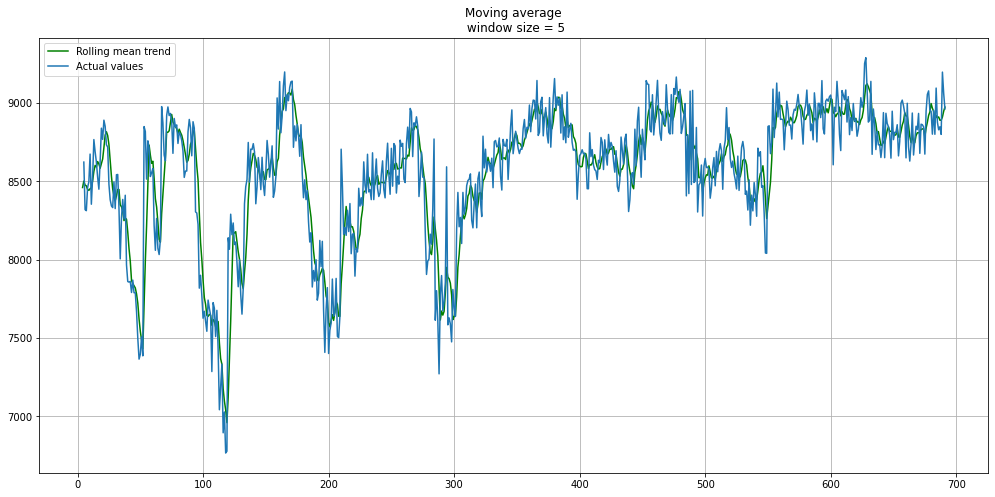

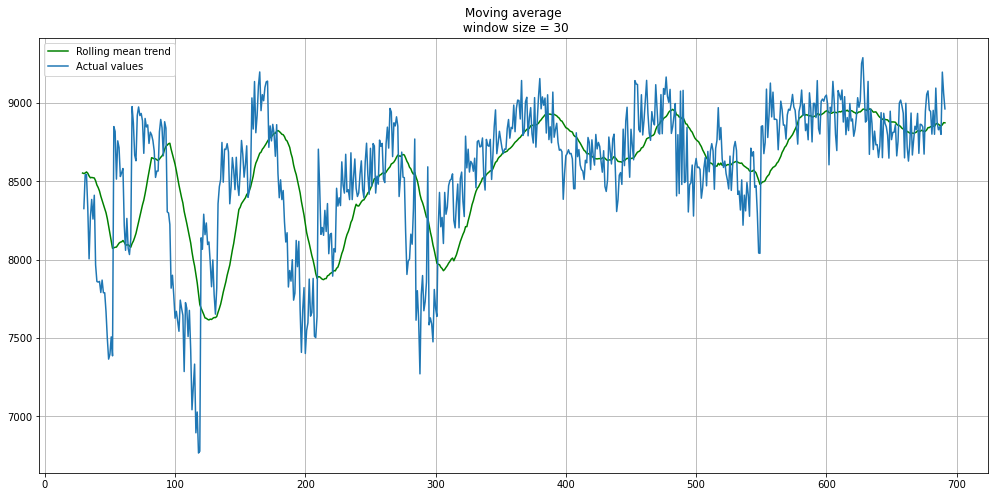

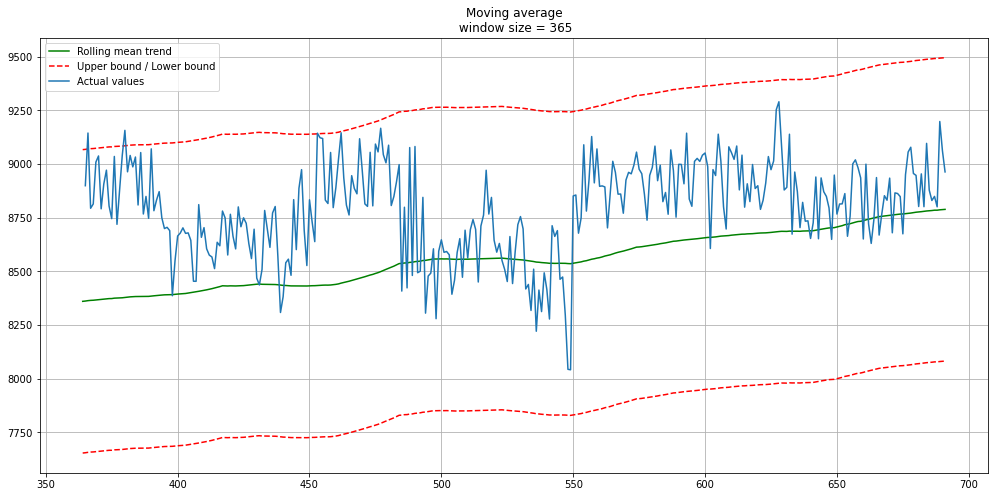

In [17]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(train.GrocerySales, 5)

#Smooth by the previous month (30 days)
plot_moving_average(train.GrocerySales, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(train.GrocerySales, 365, plot_intervals=True)

In [18]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train.GrocerySales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.316546
p-value: 0.000416
